In [1]:
import pandas as pd

df = pd.read_csv('./data/Mall_Customers.csv')

df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


DBSCAN은 feature 간 거리를 기준으로 클러스터를 구성하는 알고리즘으로, 이 과정을 위해서는 <span style="color:red;">정규화가 필수적</span>이다.

In [6]:
from sklearn.preprocessing import StandardScaler

data = df[['Annual Income (k$)', 'Spending Score (1-100)']]
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

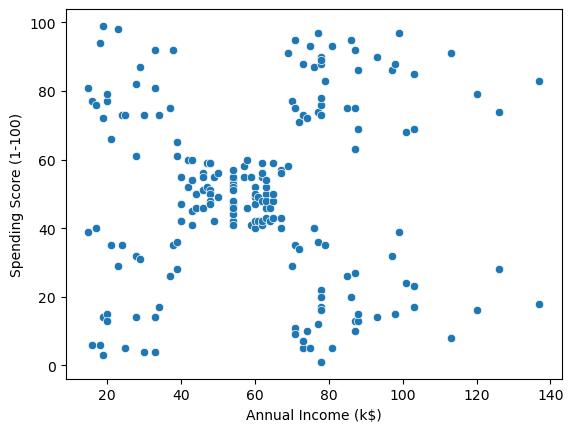

In [7]:
import seaborn as sns

sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'])

In [8]:
scaler = StandardScaler()
df_scale = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
df_scale



,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

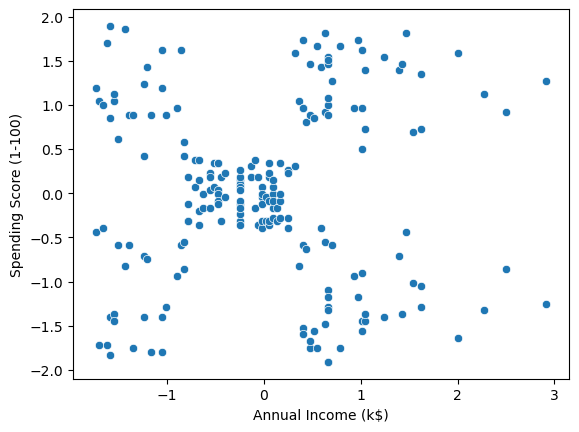

In [9]:
sns.scatterplot(x=df_scale['Annual Income (k$)'], y=df_scale['Spending Score (1-100)'])

### 클러스터링 과정 구현
DBSCAN Clustering을 위해서는 현재 군집 상태로부터 최대 탐색 거리를 의미하는 엡실론의 값과 클러스터로 구성되기 위한 최소 샘플 개수인 min_samples 값을 지정해줘야 한다.

In [4]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.5, min_samples=2)

model.fit(df_scale)
df_scale['cluster'] = model.fit_predict(df_scale)
df_scale

,Annual Income (k$),Spending Score (1-100),cluster
0,-1.738999,-0.434801,0
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,0
3,-1.700830,1.040418,0
4,-1.662660,-0.395980,0
...,...,...,...
195,2.268791,1.118061,3
196,2.497807,-0.861839,-1
197,2.497807,0.923953,3
198,2.917671,-1.250054,-1


### 클러스터링 시각화

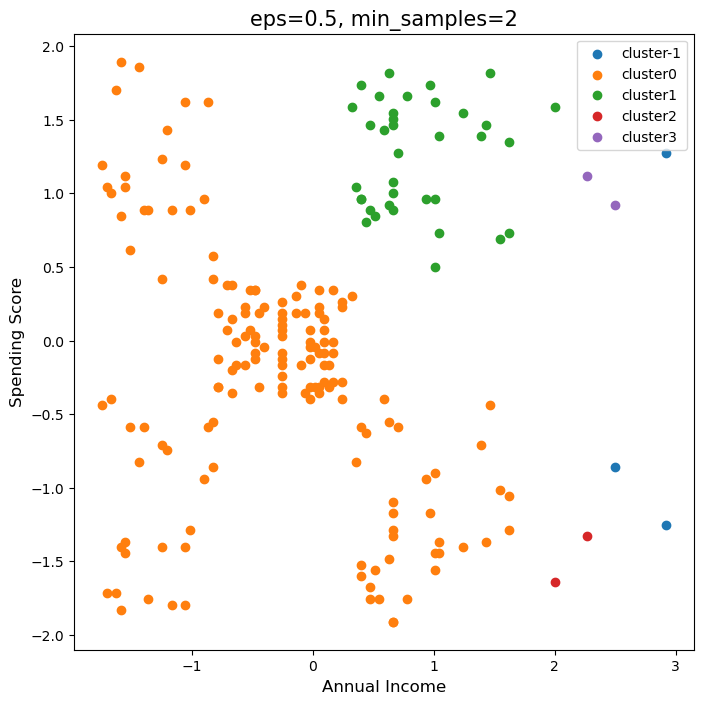

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

for i in range(-1, df_scale['cluster'].max() + 1):
    plt.scatter(df_scale.loc[df_scale['cluster'] == i, 'Annual Income (k$)'], df_scale.loc[df_scale['cluster'] == i, 'Spending Score (1-100)'], label='cluster' + str(i))

plt.legend()
plt.title('eps=0.5, min_samples=2', size=15)
plt.xlabel('Annual Income', size=12)
plt.ylabel('Spending Score', size=12)
plt.show()

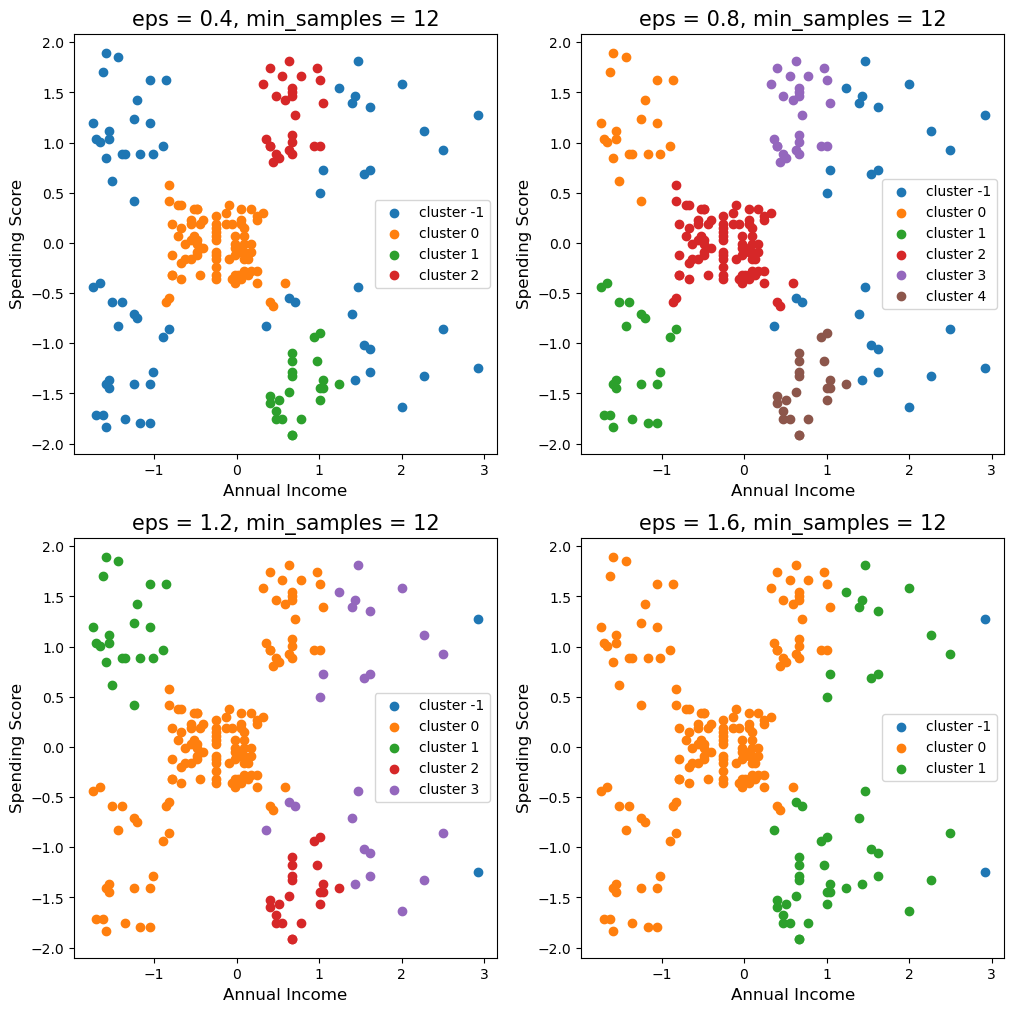

In [6]:
# 다중 플롯 동시 시각화
f, ax = plt.subplots(2, 2)
f.set_size_inches((12, 12))

for i in range(4):
    # epsilon을 증가시키면서 반복
    eps = 0.4 * (i + 1)
    min_samples = 12

    # 군집화 및 시각화 과정 자동화
    model = DBSCAN(eps=eps, min_samples=min_samples)

    model.fit(df_scale)
    df_scale['cluster'] = model.fit_predict(df_scale)

    for j in range(-1, df_scale['cluster'].max() + 1):
        ax[i // 2, i % 2].scatter(df_scale.loc[df_scale['cluster'] == j, 'Annual Income (k$)'], df_scale.loc[df_scale['cluster'] == j, 'Spending Score (1-100)'], 
                        label = 'cluster ' + str(j))

    ax[i // 2, i % 2].legend()
    ax[i // 2, i % 2].set_title('eps = %.1f, min_samples = %d'%(eps, min_samples), size = 15)
    ax[i // 2, i % 2].set_xlabel('Annual Income', size = 12)
    ax[i // 2, i % 2].set_ylabel('Spending Score', size = 12)
plt.show()

# Iris Datasets / DBSCAN Example

In [7]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
labels = pd.DataFrame(iris.target)
labels.columns = ['labels']
data = pd.DataFrame(iris.data)
data.columns = ['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

feature = data[ ['Sepal length','Sepal width','Petal length','Petal width']]
feature.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

model = DBSCAN(eps=0.5, min_samples=5)
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns = ['predict']

r = pd.concat([feature, predict], axis=1)

print(r)

     Sepal length  Sepal width  Petal length  Petal width  predict
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        1
146           6.3          2.5           5.0          1.9        1
147           6.5          3.0           5.2          2.0        1
148           6.2          3.4           5.4          2.3        1
149           5.9          3.0           5.1          1.8        1

[150 rows x 5 columns]


예측된 군집은 아래의 형태와 같다

C:\Users\wogus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wogus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wogus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wogus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

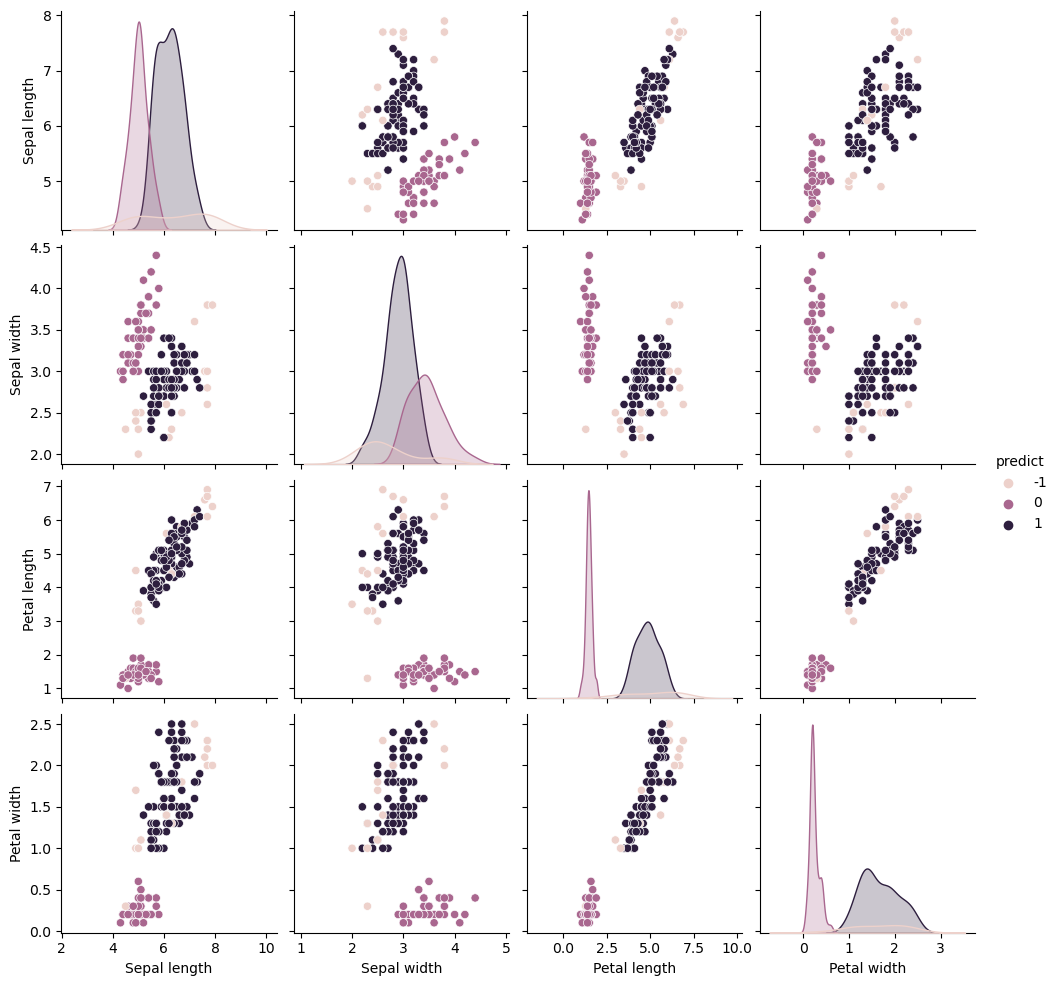

In [9]:
sns.pairplot(r, hue='predict')
plt.show()